# Uniform Distribution Modulo One Infinite Sequences

Integration, especially in higher dimensions, is a powerful tool used in a large variety of practical applications. One such example is in option pricing. 

As such, we often require integrals of $f(\bf{x})$ (that is, where $\bf{x}$ is an $s$-dimensional vector) that look like this:
$$
\begin{equation}
\int_{\left[ 0, 1 \right]^{s}} f \left( \bf{x} \right) d \bf{x}
\end{equation}
$$

where $\left[ 0, 1 \right]^{s}$ is the $s$-dimensional unit cube. However, for most functions $f(\bf{x})$ arising in practical applications, the integral above cannot be solved analytically. We thus turn to solving these integrals numerically - that is, finding algorithms that approximate the true value of the integral.

The central problem for these algorithms is efficiency. An algorithm that requires fewer iterations to achieve a desired accuracy (and thus has a smaller error) reduces the amount of time and computing power to determine the same result. The aim is to find deterministic constructions that best minimise error (well, at least better than random sampling). We use the quasi-Monte Carlo (QMC) method, with the rule

$$
\begin{equation}
Q_{N, s} \left( f \right) = \frac{1}{N} \sum_{n = 0}^{N - 1} f \left( \bf{x}_n \right)
\end{equation}
$$

We thus need sequences with points that are "well" distributed in the required s-dimensional volume (in this case, $\left[ 0, 1 \right) ^ {s}$) - which we define as Uniform Distribution Modulo One sequences. 

We define an infinite sequence $\mathcal{S} = \left( \bf{x}_{n} \right)_{n \in \mathbb{N}_{0}}$ in $\left[ 0, 1 \right) ^ {s}$ as $\textit{uniformly distributed modulo one}$ if for every interval of the form $\left[ \bf{a}, \bf{b} \right) \subseteq \left[ 0, 1 \right) ^ {s}$ we have

$$
\begin{equation}
\lim_{N \to \infty} \frac{A \left(\left[ \bf{a}, \bf{b} \right), \mathcal{S}, N \right)}{N}= \lambda_{s} \left(\left[ \bf{a}, \bf{b} \right) \right)
\end{equation}
$$

where $A \left( \left[ \bf{a}, \bf{b} \right), \mathcal{S}, N \right) = \{n \in \mathbb{N}_{0} : 0 \leq n \leq N - 1$ and $\bf{x}_{n} \in  \left[ \bf{a}, \bf{b} \right) \}$ and $\lambda_{s} \left(\left[ \bf{a}, \bf{b} \right) \right)$ refers to the s-dimensional Lebesgue measure, which reduces to $\prod^{s}_{j = 1} \left( b_j - a_j \right)$, where $\bf{a}$ $ = \{ a_1, a_2, ..., a_s \}, \bf{b}$ $ = \{ b_1, b_2, ..., b_s \}$. 

## Outline of Programme

This programme discusses several sequences that are uniformly distributed modulo one and how efficient each sequence in conducting numerical integration. Each sequence is tested for which bases provide the most efficient numerical integration, after which the best bases from each sequence are tested against each other.

In [1]:
# Additional Modules

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Van der Corput Sequences

We begin with van der Corput sequences. These sequences are one-dimensional, with a single base $b$. The van der Corput sequences make use of the $b$-adic radical inverse function, $\phi_{b}$.

### $b$-adic radical inverses
Similarly to how integers can be represented in b-adic expansions (the most famous of which are 2-adic or binary expansions), all integers can be expressed in $b$-adic radicals instead, with use of $\phi_{b}: \mathbb{N} \to \left[ 0, 1 \right)$, defined as:

$$
\phi_{b} \left( n \right) = \frac{n_{0}}{b} + \frac{n_1}{b^{2}} + \frac{n_2}{b^{3}} + \ ...
$$ 

where $\{ n_0, n_1, n_2, ... \}$ are coefficients of the b-adic expansion of $n = n_0 + n_1 b + n_2 b^{2} + \ ...$, where $n_{i} \in \{ 0, 1, ..., b - 1 \}$. For example, suppose $n = 11$, $b = 3$. we can express $11 = 2 + 0 \times 3 + 1 \times 3^{2}$, thus we have $n_0 = 2, n_1 = 0, n_2 = 1$. Therefore, $\phi_3 \left( 11 \right) = \frac{2}{3} + \frac{0}{9} + \frac{1}{27}  \approx 0.70370$.

From there, the $b$-adic radical inverses for each integer can be calculated, giving the van der Corput sequence. Formally, we define the van der Corput sequence in base $b$ as $\left( x_{n} \right) _ {n \in \mathbb{N}}$ with $x_{n} =  \phi_{b} \left( n \right)$.

The function `phi` below calculates the `b`-adic radical inverse of the input `n`. Here, we do not create a function to generate a van der Corput sqeuence - we are more interested in higher dimensional numerical integration, more so than integration in one dimension.

In [2]:
def phi(n, b):
    """
    Calculates the reflection of the b-adic digit expansion of n.
    """
    
    # Write n as a inverse b-adic digit expansion (in the form of a list)
    if n == 0: 
        return 0
    
    n_b = []
    digits = int(np.floor(np.log(n)/np.log(b)))
    
    for i in range(digits, -1, -1):
        dig, n = n // b**i, n % b**i 
        n_b.insert(0, dig)
        
    # Convert into a fraction
    ans = 0
    for i in range(digits+1):
        ans += n_b[i]/(b**(i+1))
    
    return ans

In [3]:
phi(8,2)

0.0625

In [4]:
phi(11,3)

0.7037037037037037

## Halton Sequences

Having introduced van der Corput sequences, we can now introduce Halton sequences. Halton sequences are essentially van der Corput sequences in higher dimensions. Now, each element in the sequence is a vector $\bf{x}_n$ $= \left( x_{n, 1}, x_{n, 2}, ... \right)$.

Formally, we define the Halton sequence in bases $b_1, b_2, ..., b_s$ as the sequence $\mathcal{S}_{b_1, ..., b_s} = $ $\left( \bf x_{n} \right) _{n \in \mathbb{N}_{0}}$ whose $n$th element is given by 

$$
{\bf{x_n}} \mathrel{\mathop:}= \left( \phi_{b_1} \left( n \right), \phi_{b_2} \left( n \right), ..., \phi_{b_s} \left( n \right) \right), \ n \in \mathbb{N}_{0}
$$

We note that in order for the Halton sequence with bases $b_1, b_2, ..., b_s$ to be uniformly distributed modulo one, $b_1, b_2, ..., b_s$ must be pairwise coprime integers. A generally obvious choice for the bases would be the prime numbers - more analysis on the most efficient choices of bases will come later on in the programme.

The function `haltonelement` generates the `n`th element of the Halton Sequence with `bases` = $b_1, b_2, ..., b_s$. The function after that, `haltonseq`, makes use of `haltonelement` to produce an array of `N` Halton sequence points using those same `bases`. The next function, `haltonplot`, provides a visual representation of the 2-dimnesional Halton Sequence up to the `N`th element.

In [5]:
def haltonelement(n, bases):
    """
    Generates the nth Halton Sequence element, with bases b1, b2, ..., bs.
    """

    ans = []
    dim = len(bases)
    for i in range(dim):
        ans.append(phi(n, bases[i]))
    return ans

In [6]:
haltonelement(8, [2, 3])

[0.0625, 0.8888888888888888]

In [7]:
def haltonseq(N, bases):
    """
    Generates the Halton Sequence with bases b1, b2, ..., bs from n = 0 to n = N-1.
    """
    
    # Generate numpy array of coordinates
    dim = len(bases)
    points = np.zeros((N, dim))
    
    # Put in correct coordinates
    for i in range(N):
        points[i] = haltonelement(i, bases)
    
    return points

In [8]:
haltonseq(10, [2, 3, 5])

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.33333333, 0.2       ],
       [0.25      , 0.66666667, 0.4       ],
       [0.75      , 0.11111111, 0.6       ],
       [0.125     , 0.44444444, 0.8       ],
       [0.625     , 0.77777778, 0.04      ],
       [0.375     , 0.22222222, 0.24      ],
       [0.875     , 0.55555556, 0.44      ],
       [0.0625    , 0.88888889, 0.64      ],
       [0.5625    , 0.03703704, 0.84      ]])

In [9]:
def haltonplot(N, bases):
    """
    Plots the 2-dimensional Halton Sequence with bases b1 and b2 from n = 0 to n = N-1.
    """
    
    if len(bases) != 2:
        print('Please set the dimension of the Halton Sequence to 2.')
        return 0
    
    points = np.transpose(haltonseq(N, bases))
    
    # Create plot
    fig1, ax1 = plt.subplots()
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])
    ax1.set_title('Halton Sequence Plot')
    
    # Plot points
    ax1.scatter(points[0], points[1], color = 'black', s = 0.1)

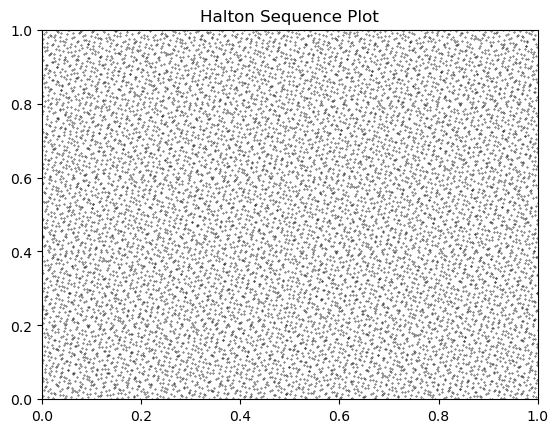

In [10]:
haltonplot(10000, [2, 5])

## Kronecker Sequences

We turn our attention to Kronecker sequences instead. The literature around Kronecker sequences is slightly fuzzy, giving different definitions. In this programme we focus on the $n \tilde{\alpha}$ sequences.

Formally, we define the Kronecker sequence with $\tilde{\alpha} = \left( \alpha_1, ... \alpha_s \right) \in \mathbb{R}^s$ to be the sequence $\left( \{ n \tilde{\alpha} \} \right)_{n \in \mathbb{N}_{0}}$, where the fractional part $ \{\cdot\}$ is applied component-wise. 

Similarly to the Halton sequence, the Kronecker sequence with $\tilde{\alpha} = \left( \alpha_1, ... \alpha_s \right)$ is uniformly distributed modulo one if and only if all elements $\{1, \alpha_1, ... \alpha_s \} $ are linearly independent over $\mathbb{Q}$. In other words, we require $\alpha_1, ... \alpha_s \in \mathbb{R} \backslash \mathbb{Q}$.

Similarly to the Halton Sequence section, we define functions `kronelement`, `kronseq` and `kronplot` to calculate the `n`th Kronecker sequence element, the Kronecker sequence up to the `N`th element and to plot the 2-dimensional Kronecker sequence respectively with `alpha`.

In [11]:
def kronelement(n, alpha):
    """
    Generates the (n)th s-dimensional Kronecker element given an s-dimensional vector alpha.
    """
    
    element = (n * np.array(alpha)) % 1
    
    return element

In [12]:
def kronseq(N, alpha):
    """
    Generates the s-dimensional Kronecker Sequence up to N points given an s-dimensional vector alpha.
    """
    
    dim = len(alpha)
    points = np.zeros((N, dim))
    
    for i in range(0, N):
        points[i] = kronelement(i+1, alpha) 
    
    return points

In [13]:
def kronplot(N, alpha):
    """
    Plots the 2-dimensional Kronecker Sequence with alpha a1 and a2 from n = 0 to n = N-1.
    
    """
    
    if len(alpha) != 2:
        print('Please set the dimension of the Kronecker Sequence to 2.')
        return 0
    
    points = np.transpose(kronseq(N, alpha))
    
    # Create plot
    fig1, ax1 = plt.subplots()
    ax1.set_xlim([0,1])
    ax1.set_ylim([0,1])
    ax1.set_title('Kronecker Sequence Plot')
    
    # Plot points
    ax1.scatter(points[0], points[1], color = 'black', s = 0.1)

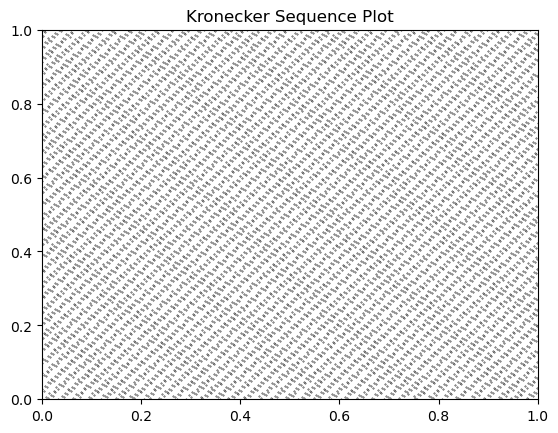

In [14]:
kronplot(10000, [np.sqrt(2), np.sqrt(3)])

## Using Uniform Distribution Modulo One Sequences in Quasi-Monte Carlo Integration

As mentioned previously, a significant application of uniform distribution modulo one sequences are their applications to numerical integration. This method of numerical integration is called Quasi-Monte Carlo (QMC) Integration, for which a rule is prescribed to the sample points used in order to increase efficiency in the approximation. In this section, we introduce the method of QMC Integration and how such sequences can be used to approximate higher-dimensional integrals.

The function `trueval`, while supposed to calculate the true value of the integral, makes use of a separate function from the `SciPy` module, `scipy.integrate.nquad`, to approximate the value of the integral instead. Comparing our QMC integrations with our sequences prescribed above is sufficient for the scope of this project given the accuracy of the function.

In [15]:
import inspect
from scipy import integrate
from sympy import primerange

primes = list(primerange(0, 100))
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [16]:
# Define the function and bounds in question
def func(x1, x2):
    return x1**(2*x2) - np.e**(2*x2+x1)

lower = [0, 0]
upper = [1, 1]

In [17]:
# Calculate the true value of the integral
def trueval(func, lower, upper):
    """
    Calculates the true value of the s-dimensional integral from vectors lower = (a_1, a_2, ..., a_s)
    to upper = (b_1, b_2, ..., b_s)
    """
    # Check if a, b and func inputs have same dimension
    function_signature = inspect.signature(func)
    dim = len(function_signature.parameters)
    if dim != len(lower) or dim!= len(upper):
        return 'Ensure the dimension across all three inputs are equal.'
    
    # Transpose Limits
    limits = np.transpose(np.array((lower, upper)))

    # Calculate integral
    integral, error = integrate.nquad(func, limits)
    
    return integral

In [18]:
truevalue = trueval(func, lower, upper)
print(truevalue)

-4.939793353629233


We now use the Quasi-Monte Carlo formula (below) and the points generated by the prescribed sequences mentioned above to approximate the integral:

$$
\begin{equation}
Q_{N, s} \left( f \right) = \frac{1}{N} \sum_{n = 0}^{N - 1} f \left( \bf{x}_n \right)
\end{equation}
$$

The function `QMC` achieves this purpose. Note that `bases` and `alpha` are optional inputs with the values used in previous examples as their default values. We use the next function, `errorplot`, to visualise the difference in algorithms to achieve a desired accuracy.

In [19]:
def QMC(N, func, seq, bases=None, alpha=None):
    """
    Generates the QMC approximation (given n points of a certain sequence) of the multivariate integral across the s-dimensional unit volume.
    """
    function_signature = inspect.signature(func)
    dim = len(function_signature.parameters)
    
    # Find points based on sequence
    if seq == 'halton':
        if bases == None:
            # Populate bases
            bases = np.array(primes[0:dim])
            print(bases)
        points = np.transpose(haltonseq(N, bases))
    elif seq == 'kronecker':
        if alpha == None:
            # Populate alpha
            alpha = np.sqrt(np.array(primes[0:dim]))
        points = np.transpose(kronseq(N, alpha))
    else:
        return 'seq is either halton or kronecker'
    
    answer = np.sum(np.array(func(*points))) / N
    return answer

In [20]:
QMC(100, func, 'halton', [2, 3])

-4.711503018241469

In [21]:
QMC(100, func, 'kronecker', alpha = [np.sqrt(2), np.sqrt(3)])

-4.856447001100643

In [22]:
def errorplot(ite, func, lower, upper, bases, alpha):
    """
    Plots the error of the approximation from the true value of the integral using different sizes of points.
    """
    # Calculate true value of integral
    truevalue = trueval(func, lower, upper)
    
    # Calculate errors
    haltonarr = []
    kronarr = []
    itearr = []
    for n in range(ite):
        N = 1000*n
        itearr.append(N)
        kronarr.append(abs(truevalue - QMC(N, func, 'kronecker', bases, alpha)))
        haltonarr.append(abs(truevalue - QMC(N, func, 'halton', bases, alpha)))
    
    # Create plot
    fig3, ax3 = plt.subplots()
    ax3.set_title('Deviation from True Value')
    
    # Plot points
    ax3.plot(itearr, haltonarr, color = 'blue')
    ax3.plot(itearr, kronarr, color = 'red')

/var/folders/rg/_zg8x1xx52b2b6jb92gd8t600000gn/T/ipykernel_74183/3498932359.py:23: RuntimeWarning: invalid value encountered in double_scalars
  answer = np.sum(np.array(func(*points))) / N


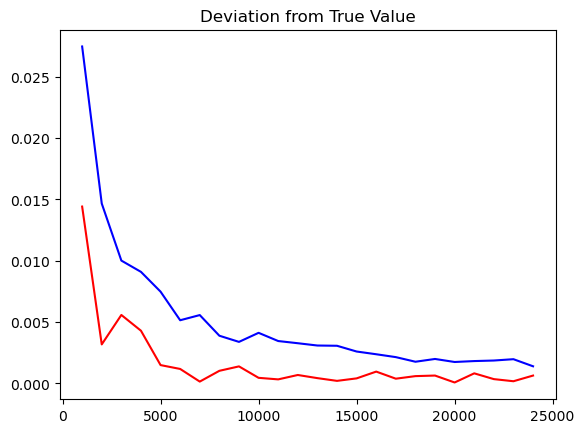

In [23]:
errorplot(25, func, lower, upper, [2, 3], [np.sqrt(2), np.sqrt(3)])

# Optimisation
In this section of the programme, we discuss how to best optimise Quasi-Monte Carlo Integration using the discussed quadrature rules. We first look at how to choose parameters to best optimise each quadrature rule, before comparing these best-case parameters for each sequence against each other.

All illustrations will use two or three dimensional sequences for visualisation purposes. The optimisation in higher dimensional examples is analogous.

In [24]:
def func1(x1, x2):
    return (x1 + 4)**2 + (x2)**2

In [25]:
def func2(x1, x2, x3):
    return x1*x2 + np.sin(np.pi * x3) + np.e**(x2/(x3+1))

In [26]:
lower2, upper2 = [0, 0], [1, 1]
lower3, upper3 = [0, 0, 0], [1, 1, 1]

In [27]:
trueval(func1, lower2, upper2)

20.666666666666668

In [28]:
trueval(func2, lower3, upper3)

2.3349507117553023

## Optimising the Halton Sequence
We recall that in order for the Halton sequence's to be uniformly distributed modulo one, the bases in question must be pairwise coprime. 

In [29]:
base21 = [2, 3]
base22 = [2, 5]
base23 = [3, 5]
base24 = [2, 7]
base25 = [3, 7]
base26 = [5, 7]
base2 = [base21, base22, base23, base24, base25, base26]

base31 = [2, 3, 5]
base32 = [2, 3, 7]
base33 = [2, 5, 7]
base34 = [3, 5, 7]
base35 = [7, 11, 13]
base36 = [2, 7, 13]
base3 = [base31, base32, base33, base34, base35, base36]

In [30]:
def haltonoptimise(func, ite = 20):
    """
    Graphs the error plot for each of the bases of a Halton sequence in the above code box.
    """
    function_signature = inspect.signature(func)
    dim = len(function_signature.parameters)
    if dim == 2:
        base = base2
        upper = upper2
        lower = lower2
    elif dim == 3:
        base = base3
        upper = upper3
        lower = lower3
        
    # True value
    truevalue = trueval(func, lower, upper)
    
    # Create plot
    fig4, ax4 = plt.subplots()
    ax4.set_title('Deviation from True Value')    
    
    for i in range(len(base)):
        itearr = []
        haltonarr = []
        for n in range(10, ite+10):
            N = 1000*n
            itearr.append(N)
            haltonarr.append(abs(truevalue - QMC(N, func, 'halton', bases = base[i])))
        ax4.plot(itearr, haltonarr, label = base[i])
    
    ax4.legend()

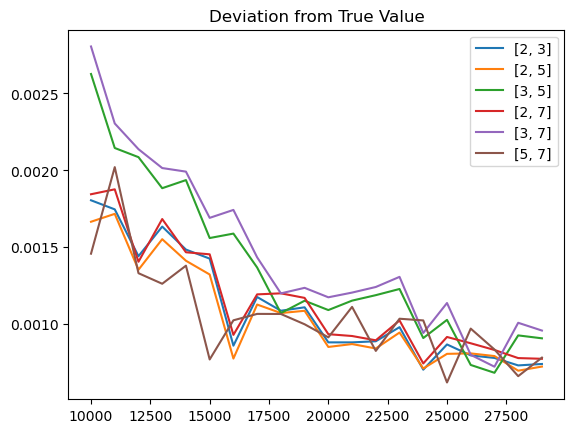

In [31]:
haltonoptimise(func1)

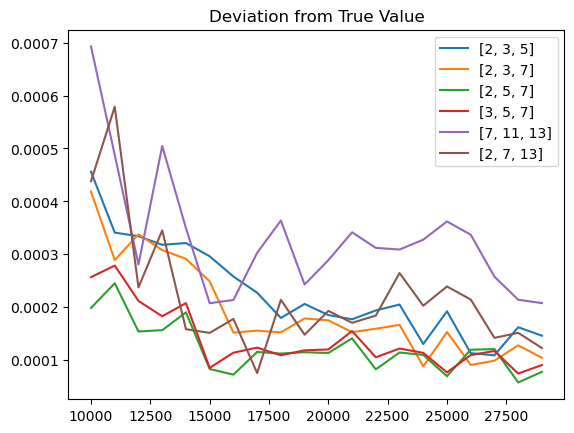

In [32]:
haltonoptimise(func2)

Judging from the values provided in the two graphs, we note that the increase in points used in the Halton plots give a generally decreasing deviation from the true value of the integration in both `func1` and `func2`. We specifically see that smaller primes give better approximations given the same number of Halton Plot points. A comparison for `func1` between the curves using primes [2, 7] and [3, 7] are an example of such a phenomenon.

However, we note that the usage of the prime number [3] seems to give larger deviations - consider the comparison for `func1` between curves using primes [2, 3] and [2, 5]. This is most likely due to the fact that the total number of points are simply too small - with a larger amount of points, we see that the deviations truly do follow the phenomenon mentioned in the previous paragraph.

## Optimising the Kronecker Sequence
We recall that in order for the Kronecker sequence's to be uniformly distributed modulo one, the elements of alpha in question must be irrational. We make use of the square roots of primes here.

In [33]:
alpha2 = np.sqrt(np.array(base2)).tolist()
alpha3 = np.sqrt(np.array(base3)).tolist()

In [34]:
def kronoptimise(func, ite = 20):
    """
    Graphs the error plot for each of the alpha of a Kronecker sequence in the above code box.
    """
    function_signature = inspect.signature(func)
    dim = len(function_signature.parameters)
    if dim == 2:
        alph = alpha2
        upper = upper2
        lower = lower2
    elif dim == 3:
        alph = alpha3
        upper = upper3
        lower = lower3
        
    # True value
    truevalue = trueval(func, lower, upper)
    
    # Create plot
    fig4, ax4 = plt.subplots()
    ax4.set_title('Deviation from True Value')    
    
    for i in range(len(alph)):
        itearr = []
        haltonarr = []
        for n in range(10, ite+10):
            N = 1000*n
            itearr.append(N)
            haltonarr.append(abs(truevalue - QMC(N, func, 'kronecker', alpha = alph[i])))
        ax4.plot(itearr, haltonarr, label = alph[i])
    
    ax4.legend()

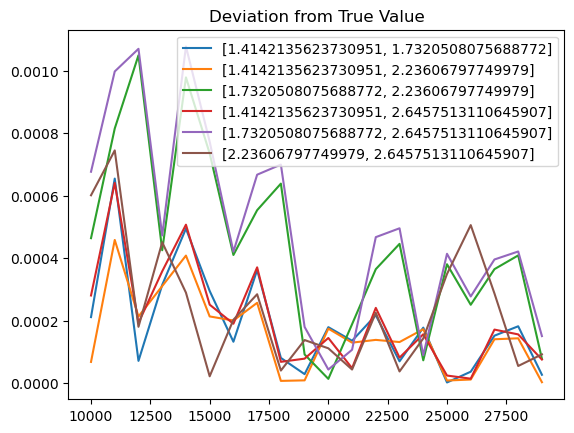

In [35]:
kronoptimise(func1)

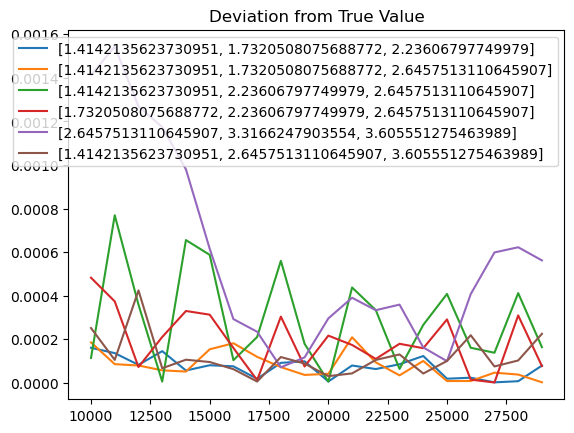

In [36]:
kronoptimise(func2)

Yet again, it seems that using smaller square roots of primes provide a better approximation of the true value (all while using the Kronecker sequence to simulate Quasi-Monte Carlo methods. The same discrepancy is seen in the case of $\sqrt{3}$ as an $\alpha$, but as mentioned previously, this discrepancy tends to disappear with larger values of points used from the Kronecker plot.

## Application: Option Pricing in Mathematical Finance
As mentioned in the introduction, one method in which QMC is heavily used is in mathematical finance - specifically in option pricing. We begin the application section with a rough introduction to options (primarily the European call option) as financial assets and their pricing strategies.

### Shares and Options
A share is defined as a financial instrument representing a fraction of an organisation. By 'holding' a share, the 'shareholder' receives a fractional ownership of the corporation, meaning they participate in the business revenue by means of dividend payments.

However, a significantly larger source of income through a share (as compared to dividend payments) is in the form of a change in price of a share. This change is dependent on many variables such as the assets of the company, the economy, inflation and future interest rates. This means that buying and selling shares (provided the share price has increased since the time of purchase) can result in financial gain, usually one or two orders of magnitude higher than that of interest payments. Of course, it comes with larger risks where the share has actually lost value. 

This means that the capability to 'predict' (provide an educated guess) of the future value of a share is extremely lucrative. We define a new financial instrument, a contingent claim, whose future value can be completely described in terms of the prices of other financial instruments (its underlyings). Such an example is an 'option' on a share.

There are multiple types of options, but we focus on the European call option (for which we will use the term 'option' from here). The option on a share with maturity $T$ is a contract, giving the reader the right (but not the obligation) to buy one share from the option writer after a fixed time $T$ in the future at the previously agreed price $K$. In exchange for this contract, the option writer is paid a 'premium' or option price, $C_{0}$, at the time of writing.

If we denote the future price of the share at time $T$ as $S_{T}$ (current value being $S_{0}$, the option holder has two choices: \
(1) if $S_{T} > K$, the option holder can exercise their right to buy the option, buying it at a lower price than the market rate at time $T$. This makes the value of the option $S_{T} - K$. \
(2) if $S_{T} \leq K$, the option holder does not exercise their right to buy the option as this is disadvantageous for the holder. This makes the value of the option $0$.

### Arbitrage and the No-Arbitrage Principle
We make a slight detour into the notion of the No-Arbitrage Principle. Arbitrage (or an 'arbitrage opportunity') is a situation in which a party receives a strictly positive profit without taking any risk or initial investment of capital. For example, if there is no premium charged by the option writer, there is absolutely no risk involved, yet virtually guaranteeing financial gain.

The No-Arbitrage Principle states that such opportuniies do not exist in a viable market. This is because if there exists a strategy in which one can make a riskless profit, one may as well scale up the strategy to inflate earnings, free of charge and risk. This means that riskless profit is limitless, reducing any market as meaningless. 

In the case of options, it can be shown that the only premium for which no-arbitrage is achieved is given by the following equation:

$$
C_{0} = e^{-rT}\tilde{\mathbb{E}} \left[ \max \left( S_{T} - K, 0 \right) \right] \tag{1}
$$

where $\tilde{\mathbb{E}}$ denotes the expectation with respect to $\tilde{\mathbb{P}}$, the probability measure equivalent to the original measure ${\mathbb{P}}$. Thus, given a specified value $K$ (the price of the share stated in the contract, or strike), one can calculate the value of the premium charged $C_{0}$ such that the option is arbitrage-free.

However, the biggest issue presented in this model is approximating the value of the expectation term. This is where we turn to predictive models, firstly using random sequences, before pivoting to QMC methods to better approximate the value of $S_{T}$ and thus $C_{0}$.

### Predicting Share Prices and QMC
Of course, 'guessing' the value of $S_{T}$ is not an easy feat. Given the volatility of shares and the notion that changes in stock prices are largely independent from past changes, we can largely assume that $S_T$ assumes a random walk. We introduce the notion of Brownian Motion to construct our equation for $S_{T}$.

#### Brownian Motion: 
A standard Brownian Motion $W$ in $\mathbb{R}^{m}$ is a stochastic process in continuous time, defined on some probability space $(\Omega, \mathcal{F}, \mathbb{P})$ with the following properties:
1. $W_{0} = 0$ almost surely;
2. $W$ has stationary increments: for any $t_{1}$, $t_{2} \geq 0$ the random variables $W_{t_{2}} - W_{t_{1}}$ and $W_{_{2} - t_{1}}$ have the same distriubtion;
3. $W$ has independent increments: for any $d \in \mathbb{N}$ and any $t_{1}, ..., t_{d} \in \left[ 0, \infty \right)$ with $t_{0}:= 0 < t_{1} < t_{2} < ... < t_{d}$, the random variables $W_{t_{1} - t_{0}}, ..., W_{t_{d} - t_{d - 1}}$ are independent;
4. $\sqrt{1/t}W_{t}$ is a standard normal $\mathbb{R}^{m}$-valued random variable for every $t \geq 0$; and 
5. $W$ has continuous paths: for each $\omega \in \Omega$ the mapping $t \rightarrow W_{t}\left( \omega \right)$ is continuous.


In [37]:
# Brownian Motion Parameters
num_steps = 1000
initial_value = 0.0
delta_t = 1.0

In this section, we construct functions to better demonstrate the ideas portrayed by the Brownian Motion. We first note that there are three classical constructions of discrete Brownian paths:
1. Forward Method
2. Brownian Bridge Construction
3. Principle Component Analysis Construction

#### Brownian Motion Construction: Forward Method

`some shit about how its formed`

The function `generate_brownian_motion` below makes use of this method, while `brownseqgraph` provides a graphical representation of the values produced through this method.

In [57]:
def generate_brownian_motion(num_steps, initial_value=0.0, delta_t=1.0):
    """Generate Brownian Motion, making use of np.random.normal."""
    
    sequence = [initial_value]
    for _ in range(num_steps):
        increment = np.random.normal(scale=np.sqrt(delta_t))
        new_value = sequence[-1] + increment
        sequence.append(new_value)
    
    sequence = np.array(sequence)
    
    return sequence

def brownseqgraph(num_steps, initial_value=0.0, delta_t=1.0):
    """Generate the Graph of the Brownian Motion."""
    
    brownian_sequence = generate_brownian_motion(num_steps, initial_value, delta_t)

    # Plotting
    fig5, ax5 = plt.subplots() 
    ax5.plot(brownian_sequence)
    ax5.set_xlabel('Time Steps')
    ax5.set_ylabel('Value')
    ax5.set_title('Brownian Motion Sequence - Forward Method')
    ax5.grid()

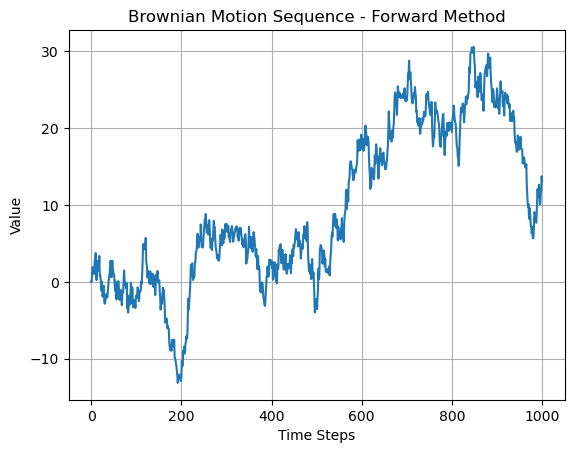

In [58]:
brownseqgraph(num_steps, initial_value, delta_t)

The Brownian Motion graph generated by these functions is rather simple, having a fixed distance between points generated. This function is sufficient for the purposes of this exploration, but a more complex system might involve inconsistent time differences.

#### Brownian Motion Construction: Bridge Construction

`some shit about how its formed`

The function `umm` below makes use of this method, while `umm` provides a graphical representation of the values produced through this method.

In [62]:
from sympy import primerange

In [63]:
def brownianbridgeinner(lower, lowerval, upper, upperval, iterate, T, seq):
    """
    Recursive Inner Function for brownianbridge
    """
    mid = (lower + upper)/2
    if mid % 1 != 0:
        finalarray = [lowerval, upperval]
        return finalarray
    else:
        #print('iterate ', iterate)
        a = seq.pop(0)
        z = norm.ppf(a)
        #print(a, z)
        midval = (lowerval + upperval)/2 + np.sqrt(T/(2**(iterate+1)))*z
        #print(mid, ', ', midval)
        lowerhalf = brownianbridgeinner(lower, lowerval, mid, midval, iterate + 1, T, seq)
        upperhalf = brownianbridgeinner(mid, midval, upper, upperval, iterate + 1, T, seq)[1:] # cut off mid val for insertion
        #print('lower ', lowerhalf, type(lowerhalf))
        #print('upper ', upperhalf, type(upperhalf))
        finalarray = lowerhalf + upperhalf
        #print(finalarray)
        return finalarray
        

def brownianbridge(M, T):
    """
    Generates Brownian Motion Sequence through Brownian Bridge Construction using Halton Sequence Numbers.
    """
    # Input check for M
    if np.log2(M) % 1 != 0:
        print("M must be a power of 2")
        return 0
    
    # Generate HALTON Sequence value
    primes = list(primerange(1, int(max(M**(3/2), 2*M))))[0:M]
    seq = list(haltonseq(100, primes)[-1])
    #print(seq)
    
    # Define start and end points, W_0 and W_M
    a = seq.pop(0)
    z = norm.ppf(a)
    W0, WM = 0, np.sqrt(T)*z
    #print(a,z)
    
    finalarray = brownianbridgeinner(0, W0, M, WM, 1, T, seq)
    
    return finalarray

In [64]:
brownianbridge(16,3)

[0,
 -0.41165159306459587,
 0.06091612335253355,
 0.6662318556336719,
 1.0242971917118557,
 0.6078947012405538,
 0.65536116433115,
 -0.11136790352771969,
 -0.57776152669572,
 -0.41910666590059653,
 -0.5419634756216671,
 -0.21954715509714995,
 0.2330525920079031,
 0.008221316587344762,
 0.5433923375598668,
 1.2638097471308094,
 1.2994111469298348]

In [65]:
def brownianbridgegraph(M, T):
    """
    Visual Representation of Brownian Motion through Brownian Bridge Construction using Halton Sequence Numbers.
    """
    index = np.arange(0, M+1)
    #print(index)
    vals = np.array(brownianbridge(M, T))
    #print(vals)
    
    # Graph
    fig6, ax6 = plt.subplots()
    ax6.plot(index, vals)
    ax6.set_xlabel('Time Steps')
    ax6.set_ylabel('Value')
    ax6.set_title('Brownian Motion Sequence - Brownian Bridge Construction')
    ax6.grid()

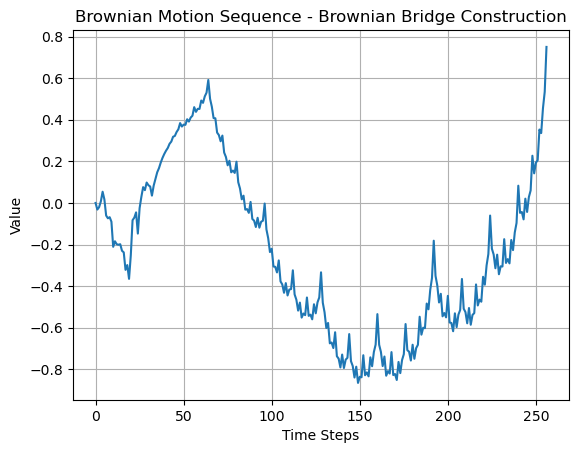

In [66]:
brownianbridgegraph(2**8, 1)

#### Brownian Motion Construction: Principle Component Analysis (PCA) Construction

`some shit about how its formed`

The function `dasfa` below makes use of this method, while `asdfasdfasf` provides a graphical representation of the values produced through this method.

In [41]:
# INSERT CODE

### Predicting $S_{T}$ and the Black-Scholes Option Pricing Formula
We can thus write $S_{T}$ as

$$
S_T = S_0 \exp \left(\left( r - \frac{\sigma^{2}}{2} \right)T - \sigma \tilde{W_{T}}\right) \tag{2}
$$

where $\tilde{W_T}$ is a Brownian Motion under probability measure $\tilde{\mathbb{P}}$. We note that $\left( r - \frac{\sigma^{2}}{2} \right)T - \sigma \tilde{W_{T}}$ is a normal random variable with m $\left( r - \frac{\sigma^{2}}{2} \right)T$ and variance $\sigma^2T$. Based on $(1)$, we find that 

$$
\begin{align}
C_0 &= \frac{\exp\left(-rT\right)}{\sqrt{2\pi\sigma^{2}T}} \int^{\infty}_{-\infty} \max\left(S_{0} \exp{\left(x\right)} - K, 0\right)\exp\left(-\frac{\left(x - \left( r - \frac{\sigma^{2}}{2}\right)T\right)^{2}}{2\sigma^{2}T}\right)dx \\
&= \frac{\exp\left(-rT\right)}{\sqrt{2\pi\sigma^{2}T}} \int^{\infty}_{\log{\left(\frac{K}{S_{0}}\right)}} \left(S_{0} \exp{\left(x\right)} - K \right)\exp\left(-\frac{\left(x - \left( r - \frac{\sigma^{2}}{2}\right)T\right)^{2}}{2\sigma^{2}T}\right)dx
\end{align}
$$

This works out nicely to give the Black-Scholes Option Pricing Formula:

$$
C_{0} = S_{0}\Phi\left(d_{1}\right) - \exp\left(-rT\right)K\Phi\left(d_{2}\right) \tag{3} \\
\Phi \left(x\right) = \frac{1}{\sqrt{2\pi}} \int^{x}_{-\infty} \exp\left(-t^{2}\right) dt \\
\begin{cases}
d_{1} = \frac{\log\frac{S_{0}}{K} + \left( r + \frac{\sigma^{2}}{2}\right)T}{\sigma \sqrt{T}} \\
d_{2} = \frac{\log\frac{S_{0}}{K} + \left( r - \frac{\sigma^{2}}{2}\right)T}{\sigma \sqrt{T}}
\end{cases} 
$$

In [61]:
# Option Pricing Parameters
S0 = 100
r = 0
sigma = 0.3
K = np.arange(90,111,1)
Tval = np.arange(1,4,1)
T = Tval[0]
ite = 10000

Of course, in a more complicated system, the analytical Black-Scholes Option Pricing Formula may not be viable, and will require simulation techniques instead. This means that instead of taking the theoretical expected value $\tilde{\mathbb{E}}$ as prescribed by the random variables provided, we run simulations of $(2)$ and take the average of $C_0$ across all simulations as a representative value of the analytical value.

In this section, we first analyse how accurate the empirical value of $C_0$ is compared to the Black-Scholes Option Pricing Formula as prescribed by $(3)$. First, `brownianmotionfinal` makes use of earlier concepts discussed in the Brownian Motion section and computes the final value at time $T$. `optionprice` then empirically determines the value of $C_0$ with different values of $K$ used (do note that for better reading of the values returned, one can remove the '#' in the final paragraph of code in `optionprice`, printing clearer information. Finally, `blackscholes` calculates the analytic value of $C_0$, and the values and errors are compared for every value of $K$ used in `comparison`.

In [43]:
def brownianmotionfinal(T, initial_value=0.0, delta_t=1.0):
    # Initialize the sequence with the initial value
    sequence = [initial_value]
    
    # Generate random increments and accumulate them
    for _ in range(T):
        increment = np.random.normal(scale=np.sqrt(delta_t))
        new_value = sequence[-1] + increment
        sequence.append(new_value)
    sequence = np.array(sequence)
    
    return sequence[-1]

def optionprice(S0, sigma, K, T, r=0, ite=10000, initial_value=0.0, delta_t=1.0):
    # Generate Brownian Motion ite times, by vectorising the Brownian Motion Function
    newfunc = np.vectorize(brownianmotionfinal)
    intermediate = np.ones(ite)*T
    Tarray = intermediate.astype(int)
    brownianmotionval = newfunc(Tarray, initial_value, delta_t)
    
    # Generate St ite times
    Stchain = S0*np.exp((r - (sigma**2)/2)*T + sigma*brownianmotionval)
    
    # Using different values of K, find C0
    Karray = []
    for n in range(len(K)):
        Ct_1 = Stchain - K[n]*np.ones(ite)
        Ct = np.sum(np.maximum(Ct_1, np.zeros(ite)))/ite
        C0 = np.exp(-r*T)*Ct
        Karray.append(C0)

    # Print Values
    #for n in range(len(K)):
    #    print("Set Price: ", K[n])
    #    print("Average Profit: ", Karray[n])
        
    return Karray

In [68]:
optionprice(S0, sigma, K, T, r=0, ite=10000, initial_value=0.0, delta_t=1.0)

[17.18551911582105,
 16.609447580442776,
 16.0488203690664,
 15.503493325262694,
 14.972300173710508,
 14.455251138099102,
 13.953133215426345,
 13.465812982644973,
 12.992293641906882,
 12.531969143660278,
 12.084224594634659,
 11.650192693575791,
 11.2299376220331,
 10.82396636204289,
 10.430741799328981,
 10.048796283541154,
 9.678236271015509,
 9.319631275108437,
 8.972244315373638,
 8.63572229465755,
 8.310249714216704]

In [69]:
def blackscholes(S0, sigma, K, T, r=0):
    Karray = []
    for n in range(len(K)):
        d1 = (np.log(S0/K[n]) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
        d2 = (np.log(S0/K[n]) + (r - sigma**2/2)*T)/(sigma*np.sqrt(T))
        C0 = S0*norm.cdf(d1) - np.exp(-r*T)*K[n]*norm.cdf(d2)
        Karray.append(C0)
        #print("Set Price: ", K[n])
        #print("Average Profit: ", Karray[n])
        
    return Karray

In [70]:
blackscholes(S0, sigma, K, T, r)

[17.0128799018497,
 16.440380493140488,
 15.882296760992027,
 15.338548203846457,
 14.809037032420676,
 14.293649102263295,
 13.7922548633763,
 13.304710320347397,
 12.830857996923754,
 12.37052789944591,
 11.923538474048499,
 11.489697553016399,
 11.068803286156744,
 10.660645053505782,
 10.265004356131428,
 9.881655682215353,
 9.51036734600136,
 9.150902297576835,
 8.803018901811711,
 8.46647168511317,
 8.1410120489642]

In [71]:
def comparison(S0, sigma, K, T, r=0, ite=10000, initial_value=0.0, delta_t=1.0):
    experimental = optionprice(S0, sigma, K, T, r, ite, initial_value, delta_t)
    analytical = blackscholes(S0, sigma, K, T, r)
    
    perror = []
    for n in range(len(K)):
        e = experimental[n]
        a = analytical[n]
        p = abs((e-a)/a)*100
        print('Option Pricing: ', e)
        print('Black-Scholes Pricing: ', a)
        print('Error (%): ', p)
        print('')
        perror.append(p)

In [76]:
comparison(S0, sigma, K, T, r, ite, initial_value, delta_t)

Option Pricing:  16.795562435456702
Black-Scholes Pricing:  17.0128799018497
Error (%):  1.277370249168519

Option Pricing:  16.220439017971728
Black-Scholes Pricing:  16.440380493140488
Error (%):  1.3378125601200486

Option Pricing:  15.659581281526675
Black-Scholes Pricing:  15.882296760992027
Error (%):  1.4022876087566618

Option Pricing:  15.113362068063084
Black-Scholes Pricing:  15.338548203846457
Error (%):  1.4681059301746875

Option Pricing:  14.581136858068884
Black-Scholes Pricing:  14.809037032420676
Error (%):  1.5389263586339972

Option Pricing:  14.064277534550062
Black-Scholes Pricing:  14.293649102263295
Error (%):  1.6047096586197431

Option Pricing:  13.561906094636736
Black-Scholes Pricing:  13.7922548633763
Error (%):  1.6701313238579114

Option Pricing:  13.073511710799226
Black-Scholes Pricing:  13.304710320347397
Error (%):  1.7377199802282826

Option Pricing:  12.597940051297059
Black-Scholes Pricing:  12.830857996923754
Error (%):  1.81529517108317

Option P

`some analysis of the values of the errors`

### Randomisation and QMC
As seen in $(2)$, the value of $S_{T}$ is dependent on some Brownian Motion variable $\tilde{W_{T}}$. In this section, we recall the ideas brought forward by the QMC methods of numerical integration. In the interest of efficiency, QMC methods allow us to decrease the number of simulations required to reach a desired accuracy of $C_0$ through simulations. 

`More stuff about QMC being used in place of randomisation`

In [77]:
def optionprice1(S0, sigma, K, M, t, T, r=0, ite=100):
    primelist = list(primerange(1, M**2))[0:M]
    
    sequence = np.transpose(np.array(haltonseq(ite+1, primelist)[1:]))[0]
    brownianmotionval = np.sqrt(T)*norm.ppf(sequence)
    Stchain = S0*np.exp((r - (sigma**2)/2)*T + sigma*brownianmotionval)
    Karray = []
    for n in range(len(K)):
        Ct_1 = Stchain - K[n]*np.ones(ite)
        Ct = np.sum(np.maximum(Ct_1, np.zeros(ite)))/ite
        C0 = np.exp(-r*T)*Ct
        Karray.append(C0)
    return Karray

In [78]:
optionprice1(S0, sigma, K, 64, 64, T, r=0, ite=1000)

[16.797755227830386,
 16.227012473185326,
 15.670159069831767,
 15.127865407733998,
 14.599446803904694,
 14.085196979396102,
 13.584797783353665,
 13.098050408923834,
 12.625326836364344,
 12.166450736480659,
 11.721226049494897,
 11.288625353302246,
 10.869129829166774,
 10.46224910048737,
 10.06760942967799,
 9.685562994762167,
 9.314966609924014,
 8.956374858219974,
 8.609647842131869,
 8.274516913457981,
 7.950752100017613]

In [79]:
blackscholes(S0, sigma, K, T, r)

[17.0128799018497,
 16.440380493140488,
 15.882296760992027,
 15.338548203846457,
 14.809037032420676,
 14.293649102263295,
 13.7922548633763,
 13.304710320347397,
 12.830857996923754,
 12.37052789944591,
 11.923538474048499,
 11.489697553016399,
 11.068803286156744,
 10.660645053505782,
 10.265004356131428,
 9.881655682215353,
 9.51036734600136,
 9.150902297576835,
 8.803018901811711,
 8.46647168511317,
 8.1410120489642]

In [80]:
def comparison1(S0, sigma, K, M, t, T, r=0, ite=10000):
    experimental = optionprice1(S0, sigma, K, M, t, T, r, ite)
    analytical = blackscholes(S0, sigma, K, T, r)
    
    perror = []
    for n in range(len(K)):
        e = experimental[n]
        a = analytical[n]
        p = abs((e-a)/a)*100
        print('Option Pricing: ', e)
        print('Black-Scholes Pricing: ', a)
        print('Error (%): ', p)
        print('')
        perror.append(p)

In [81]:
comparison1(S0, sigma, K, 64, 64, T, r=0, ite=1024)

Option Pricing:  16.919060893212716
Black-Scholes Pricing:  17.0128799018497
Error (%):  0.5514587135055482

Option Pricing:  16.347046484379653
Black-Scholes Pricing:  16.440380493140488
Error (%):  0.5677119747914385

Option Pricing:  15.789450286101001
Black-Scholes Pricing:  15.882296760992027
Error (%):  0.5845909838371923

Option Pricing:  15.246194756708647
Black-Scholes Pricing:  15.338548203846457
Error (%):  0.602100315560836

Option Pricing:  14.717164513273488
Black-Scholes Pricing:  14.809037032420676
Error (%):  0.6203814532035811

Option Pricing:  14.202272106526813
Black-Scholes Pricing:  14.293649102263295
Error (%):  0.6392838881291215

Option Pricing:  13.701365109517457
Black-Scholes Pricing:  13.7922548633763
Error (%):  0.658991258203832

Option Pricing:  13.214307126675827
Black-Scholes Pricing:  13.304710320347397
Error (%):  0.6794826155163458

Option Pricing:  12.740944262848199
Black-Scholes Pricing:  12.830857996923754
Error (%):  0.7007616645520689

Option 

## Conclusion

`idk some stuff`